In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
# Define the number of data points for each time series
n_data_points = 100

# Time axis
t = np.linspace(0, 10, n_data_points)

# Generate the four time series
linear_upward = t/10
linear_downward = - t/10
cosine_low_freq = np.cos(np.pi * t/3)
cosine_high_freq = np.cos(2 * np.pi * t)

# Combine into a dataset
time_series_dataset = np.vstack((linear_upward, linear_downward, cosine_low_freq, cosine_high_freq))


# Visualize dataset

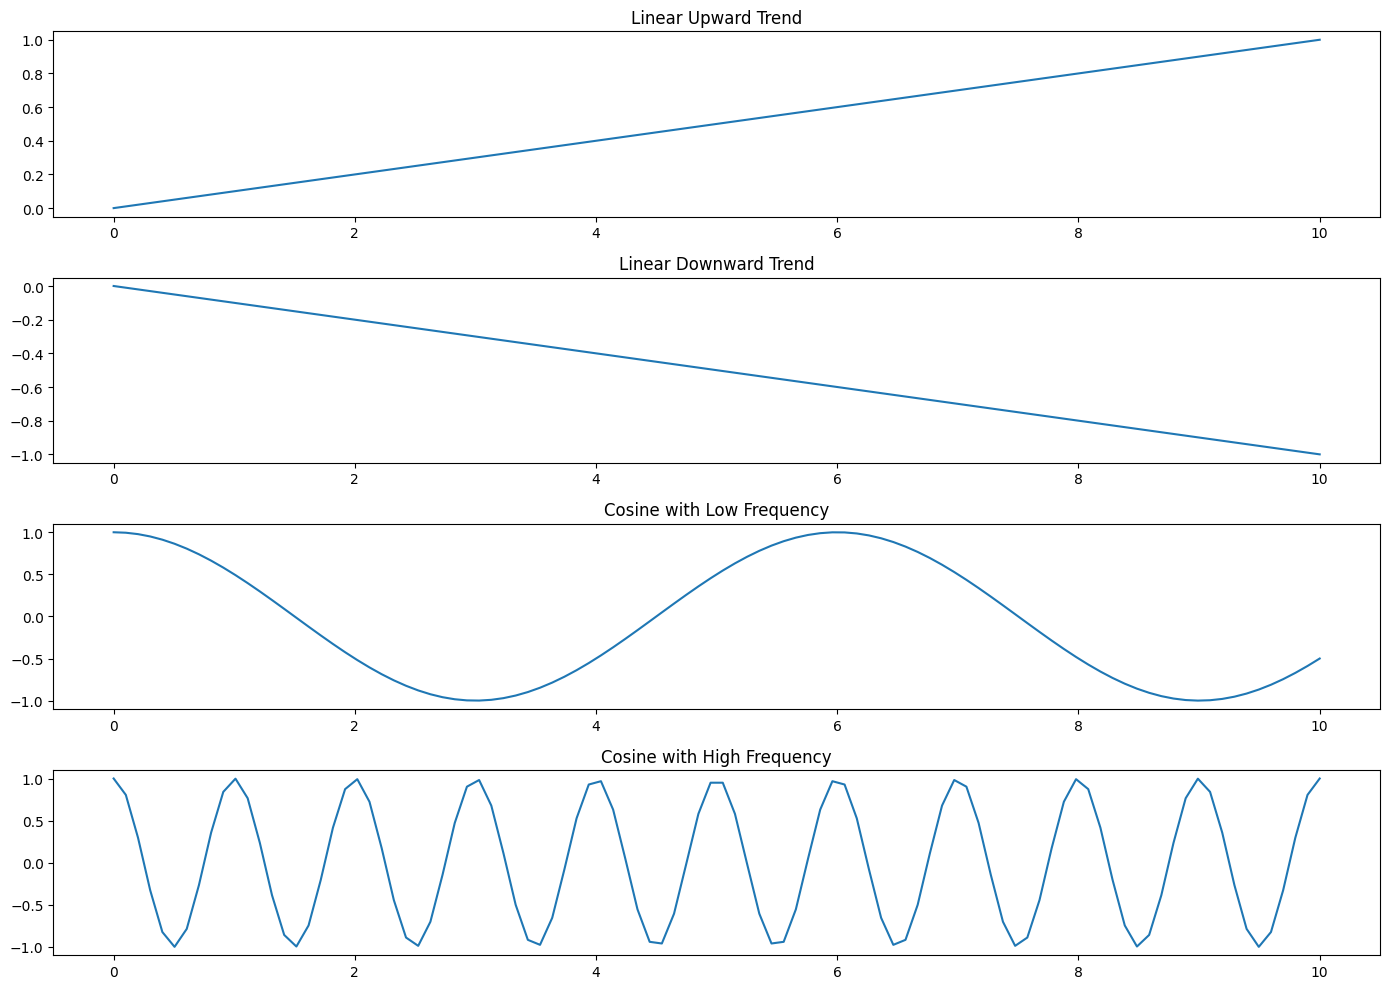

In [23]:
# Plotting the time series
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(t, linear_upward)
plt.title('Linear Upward Trend')

plt.subplot(4, 1, 2)
plt.plot(t, linear_downward)
plt.title('Linear Downward Trend')

plt.subplot(4, 1, 3)
plt.plot(t, cosine_low_freq)
plt.title('Cosine with Low Frequency')

plt.subplot(4, 1, 4)
plt.plot(t, cosine_high_freq)
plt.title('Cosine with High Frequency')

plt.tight_layout()
plt.show()

# TSMixer

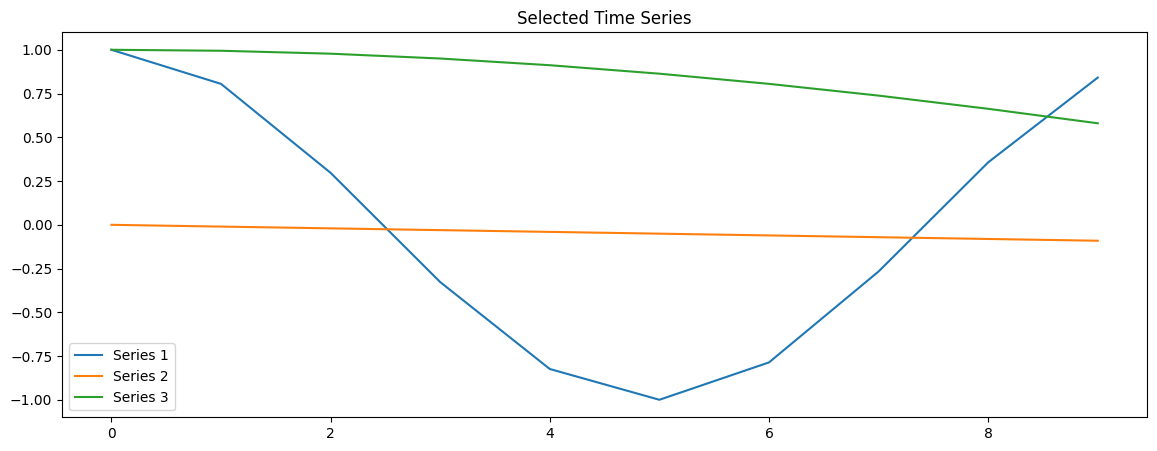

[0.57821506 0.12878693 0.29299801]
Mixed Time Series Shape: (10,)


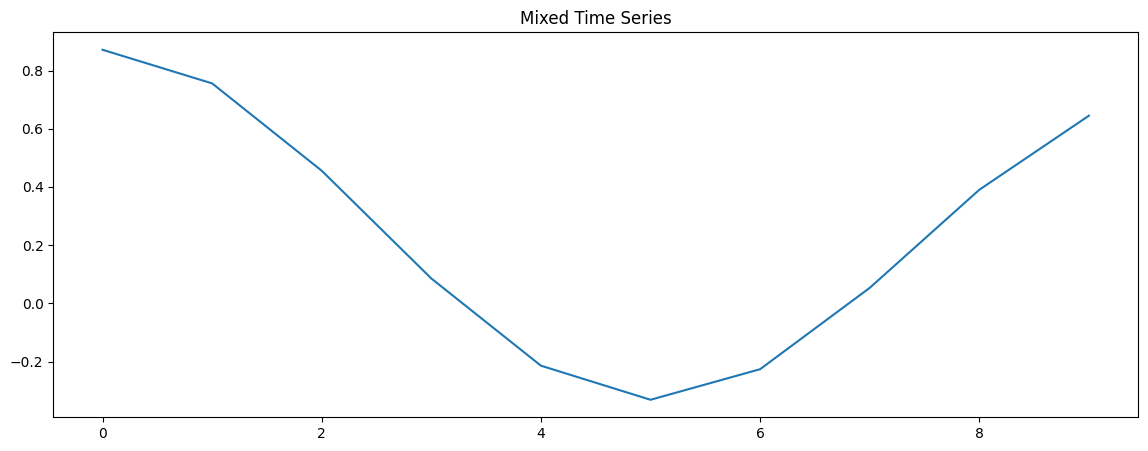

In [75]:
def scale_time_series(time_series):
    """
    Applies mean scaling to each time series.
    
    Each time series is scaled to have a mean of 0 and is divided by its range (max-min).
    """
    # Subtract the mean from each series
    mean_subtracted = time_series - np.mean(time_series, axis=1, keepdims=True)
    
    # Calculate the range (max-min) for each series
    ts_range = np.max(time_series, axis=1, keepdims=True) - np.min(time_series, axis=1, keepdims=True)
    
    # Avoid division by zero for constant series by using np.where to only divide by range if it's non-zero
    scaled_time_series = np.where(ts_range != 0, mean_subtracted / ts_range, mean_subtracted)
    
    return scaled_time_series

def TSMix(time_series_dataset, lmin, lmax, K, alpha, scaling=False, plot=False):
    """
    TSMix implementation for time series data augmentation.
    
    Parameters:
    - time_series_dataset: numpy array of shape (n_samples, time_series_length), the dataset of time series.
    - lmin, lmax: int, minimum and maximum length of the time series to sample.
    - K: int, the upper bound for number of time series to mix.
    - alpha: float, the parameter for the Dirichlet distribution.
    - scaling: bool, whether to apply mean scaling to the time series.
    - plot: bool, whether to plot the selected time series.
    
    Returns:
    - mixed_time_series: numpy array, the result of the TSMix augmentation.
    """
    # Sample k from U{1, K} and l from U{lmin, lmax}
    k = np.random.randint(1, K+1)
    l = np.random.randint(lmin, lmax+1)
    
    # Randomly select k time series from the dataset and truncate/pad to length l
    selected_indices = np.random.choice(time_series_dataset.shape[0], size=k, replace=False)
    selected_time_series = np.array([time_series_dataset[idx][:l] for idx in selected_indices])

    # Plot selected time series
    if plot:
        plt.figure(figsize=(14, 5))
        for i, series in enumerate(selected_time_series):
            plt.plot(series, label=f'Series {i+1}')
        plt.title('Selected Time Series')
        plt.legend()
        plt.show()

    
    # Scale the selected time series
    if scaling:
        scaled_time_series = scale_time_series(selected_time_series)
    else:
        scaled_time_series = selected_time_series
    
    # Sample weights from a symmetric Dirichlet distribution
    weights = np.random.dirichlet(alpha=[alpha]*k)
    if plot:
        print("Weights:", weights)

    
    # Take the convex combination of the selected time series
    mixed_time_series = np.sum(weights[:, np.newaxis] * scaled_time_series, axis=0)
    
    return mixed_time_series


# Parameters for TSMix
lmin = 10
lmax = 10
K = 3
alpha = 0.5

# Generate a mixed time series
mixed_time_series = TSMix(time_series_dataset, lmin, lmax, K, alpha)

# Plotting the mixed time series
plt.figure(figsize=(14, 5))
plt.plot(mixed_time_series)
plt.title('Mixed Time Series')
plt.show()
